<a href="https://colab.research.google.com/github/mikemykhaylov/MAT-494/blob/main/1_4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy seaborn scipy matplotlib ipympl pillow scikit-learn requests

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_low_rank_matrix
from PIL import Image
import requests
from io import BytesIO

In [4]:
%matplotlib widget

# 1.4 Principal Component Analysis

Topics of this chapter
- Singular Value Decomposition
- Low-rank matrix approximation
- Principal Component Analysis

## Singular Value Decomposition

Singular Value Decomposition (SVD) is a matrix decomposition method for any matrix $A \in \mathbb{R}^{m \times n}$, which can be written as
$$ A = U \Sigma V^T $$
where $U \in \mathbb{R}^{m \times m}$ and $V \in \mathbb{R}^{n \times n}$ are orthogonal matrices, and $\Sigma \in \mathbb{R}^{m \times n}$ is a diagonal matrix with non-negative real numbers on the diagonal. The diagonal elements of $\Sigma$ are called the singular values of $A$.

In [5]:
# create a random matrix
A = np.random.rand(5, 10)

# compute the singular value decomposition
U, S, V = np.linalg.svd(A)

# check the shapes of the matrices
print(U.shape, S.shape, V.shape)

# check that U, V are orthogonal
print(np.allclose(np.eye(5), U @ U.T))
print(np.allclose(np.eye(10), V @ V.T))

# Numpy returns S as a 1-d array, so we need to convert it to a diagonal matrix
S = np.diag(S)

# extend S to be the same size as A
S = np.pad(S, ((0, A.shape[0] - S.shape[0]), (0, A.shape[1] - S.shape[1])), mode='constant')

print(S.shape)

# check that we can reconstruct A
print(np.allclose(A, U @ S @ V))

(5, 5) (5,) (10, 10)
True
True
(5, 10)
True


## Low-rank matrix approximation

The SVD can be used to approximate a matrix $A$ by a matrix $A_k$ of rank $k$ by setting all singular values $\sigma_{k+1}, \dots, \sigma_{\min(m,n)}$ to zero. The approximation error is given by
$$ \| A - A_k \|_2^2 = \sigma_{k+1}^2 $$
where $\| \cdot \|_2$ denotes the matrix norm. One possible applicaton is to compress images by approximating the image matrix by a matrix of low rank.

(300, 332)


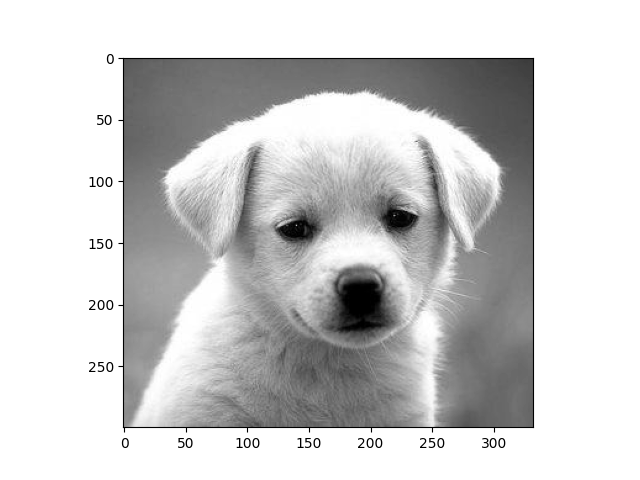

In [6]:
# open image as a matrix
response = requests.get("https://i.stack.imgur.com/B2DBy.jpg")
img = Image.open(BytesIO(response.content))
img = np.array(img)
img = img[:,:,0]

print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

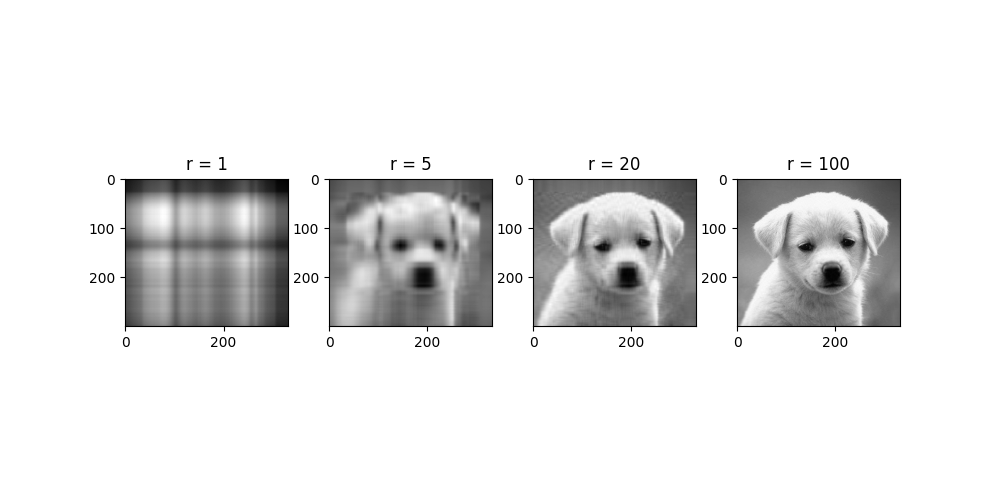

In [7]:
# perform SVD
U, S, V = np.linalg.svd(img)

# plot image with different rank approximations

fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

for i, r in enumerate([1, 5, 20, 100]):
    img_approx = U[:, :r] @ np.diag(S[:r]) @ V[:r, :]
    ax[i].imshow(img_approx, cmap='gray')
    ax[i].set_title('r = {}'.format(r))

plt.show()

## Principal Component Analysis

Principal Component Analysis (PCA) is a method for dimensionality reduction. The idea is to find a low-dimensional subspace that captures most of the variance of the data. The first principal component is the direction in which the data varies the most. The second principal component is the direction in which the data varies the second most, and so on. The principal components are the eigenvectors of the covariance matrix of the data. The corresponding eigenvalues are the variances of the data in the direction of the principal components.

[0.39270464 0.31956062 0.17660786 0.0697937  0.02254997 0.0077639
 0.00379908 0.00271038 0.00234818 0.00216168]


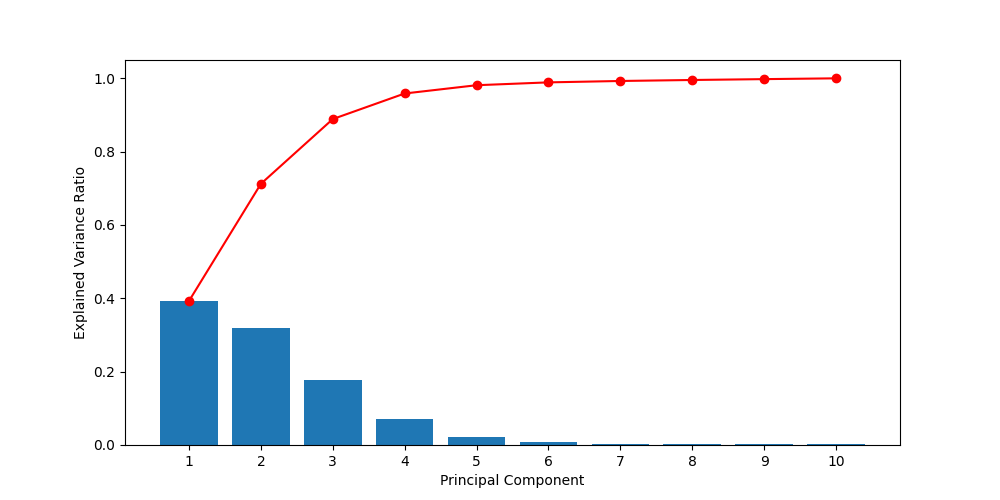

In [8]:
# create a dummy dataset with multiple independent and several noise features
A = make_low_rank_matrix(n_samples=100, n_features=10, effective_rank=3, tail_strength=0.1, random_state=42)

# compute the covariance matrix
C = 1 / A.shape[0] * A.T @ A

# compute the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(C)

# sort the eigenvalues and eigenvectors
idx = eigvals.argsort()[::-1]

eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# compute the explained variance ratio
explained_variance_ratio = eigvals / eigvals.sum()
print(explained_variance_ratio)

# cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# plot the explained variance ratio
x = np.arange(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(10, 5))
plt.bar(x, explained_variance_ratio)
plt.plot(x, cumulative_explained_variance_ratio, c='red', marker='o')
plt.xticks(x)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()